# Min-Distance Classifier

In [4]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import random
from sklearn import datasets

import numpy as np

## Generate dataset

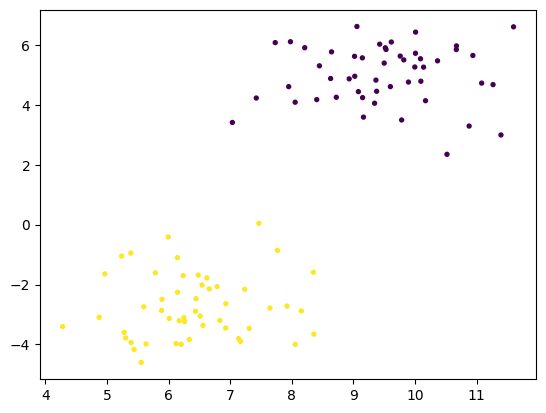

In [76]:
X,y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
plt.scatter(X[:,0],X[:,1],c=y,s=8)


# Set Prototype

In [115]:
X_type1 = np.array(X[y == 0])
X_type1 = np.mean(X_type1, axis=0)
X_type2 = np.array(X[y == 1])
X_type2 = np.mean(X_type2, axis=0)


In [116]:
#gi(x) = xiT*x - (1/2)*xiT*xi,
#Sij=g(i)-g(j)=0
X_type1_transpose = np.transpose(X_type1)
X_type2_transpose = np.transpose(X_type2)
w1 =(-1/2)* np.dot(X_type1,X_type1_transpose) #+ X_type1_transpose*X
w2 =(-1/2)* np.dot(X_type1,X_type1_transpose) #+ X_type2_transpose*X



In [117]:
# g1: X_type1[0]*x+X_type1[1]*y+w1=0
# g2: X_type2[0]*x+X_type2[1]*y+w2=0
# s1: g1-g2=0

In [118]:
surface_x=np.linspace(4, 15, 100)
surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x)/(X_type1[1]-X_type2[1])

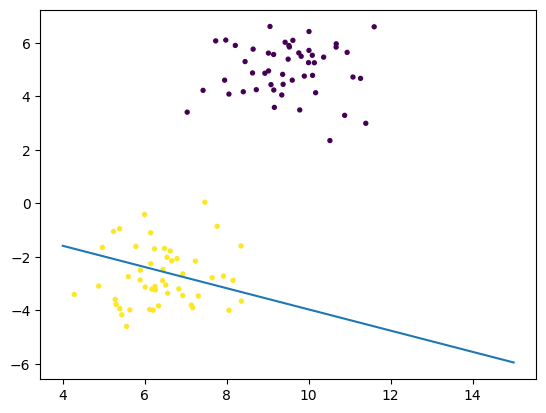

In [119]:
plt.scatter(X[:,0],X[:,1],c=y,s=8)
# draw decision surface
plt.plot(surface_x, surface_y)
plt.show()

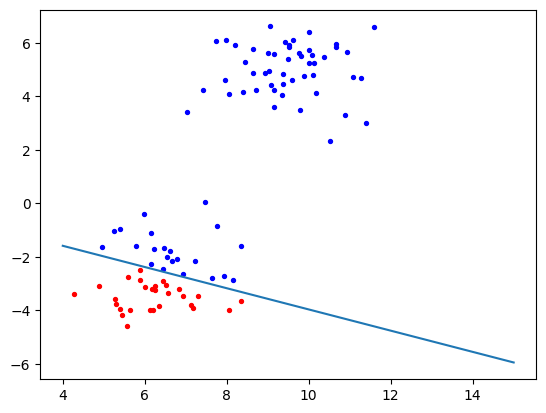

In [114]:
bias=0
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)
surface_x=np.linspace(4, 15, 100)
surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()

## Training process

In [120]:
bias=0
learning_rate=0.5
for epoce in range(5):
  for i,zz in enumerate(X):
    a,b=zz
    descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
    if descriminator>0:
      if y[i]!=0:
        bias=bias+(y[i]-descriminator)*learning_rate
    else:
      if y[i]!=1:
        bias=bias+(y[i]-descriminator)*learning_rate


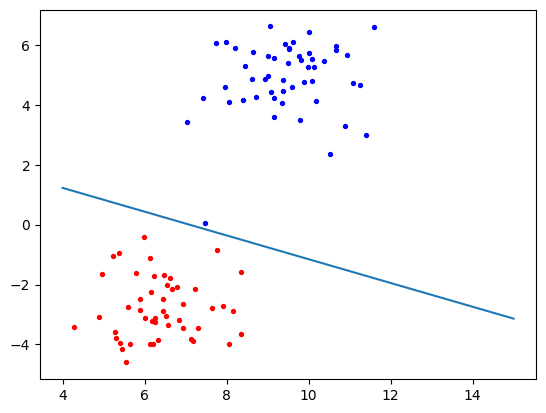

In [121]:
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)
surface_x=np.linspace(4, 15, 100)
surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()